In [52]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from collections import Counter
import matplotlib.pyplot as plt

kelly = ['#af2337', '#ecc342', '#2967a0', '#2f3c28', '#96b437',
         '#da93ab', '#e58932', '#80598f', '#7e331f', '#3b855a',
         '#c0b286', '#a9c9ed', '#ec977f', '#848482', '#604628',
         '#d26034', '#a64c6b', '#dbd245', '#eba83b', '#5d5092',
         '#222222', '#f2f3f4']

mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=kelly)
mpl.rcParams['axes.titlesize'] = 19
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['legend.markerscale'] = 2
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['figure.dpi'] = 100

sns.set_style('ticks')

# Compare data from standard cell lines

In [3]:
metrics_location = [
    ['ISSAAC-seq (FACS)'   , 'K562'   , 'ATAC', './issaac-seq_preprocessing/K562_FACS/ATAC/downsampled_40k_reads/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (FACS)'   , 'K562'   , 'RNA' , './issaac-seq_preprocessing/K562_FACS/RNA/downsampled_40k_reads/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'K562'   , 'ATAC', './issaac-seq_preprocessing/K562_Droplet/ATAC/downsampled_40k_reads/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'K562'   , 'RNA' , './issaac-seq_preprocessing/K562_Droplet/RNA/downsampled_40k_reads/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['10x Multiome'        , 'K562'   , 'ATAC', './other_methods_preprocessing/10x_multiome/K562/ATAC/full_analysis/outs/filtered_mtx/metrics.csv'],
    ['10x Multiome'        , 'K562'   , 'RNA' , './other_methods_preprocessing/10x_multiome/K562/RNA/full_analysis/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['SHARE-seq'           , 'K562'   , 'ATAC', './other_methods_preprocessing/share-seq/K562/ATAC/filtered/metrics.csv'],
    ['SHARE-seq'           , 'K562'   , 'RNA' , './other_methods_preprocessing/share-seq/K562/RNA/filtered/metrics.csv'],
    ['SNARE-seq'           , 'K562'   , 'ATAC', './other_methods_preprocessing/snare-seq/cell_line_mixture/ATAC/K562/metrics.csv'],
    ['SNARE-seq'           , 'K562'   , 'RNA' , './other_methods_preprocessing/snare-seq/cell_line_mixture/RNA/K562/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'GM12878', 'ATAC', './issaac-seq_preprocessing/GM12878_Droplet/ATAC/downsampled_50k_reads/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'GM12878', 'RNA' , './issaac-seq_preprocessing/GM12878_Droplet/RNA/downsampled_50k_reads/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['10x Multiome'        , 'GM12878', 'ATAC', './other_methods_preprocessing/10x_multiome/GM12878/ATAC/metrics.csv'],
    ['10x Multiome'        , 'GM12878', 'RNA' , './other_methods_preprocessing/10x_multiome/GM12878/RNA/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['SHARE-seq'           , 'GM12878', 'ATAC', './other_methods_preprocessing/share-seq/GM12878/ATAC/filtered/metrics.csv'],
    ['SHARE-seq'           , 'GM12878', 'RNA' , './other_methods_preprocessing/share-seq/GM12878/RNA/filtered/metrics.csv'],
    ['SNARE-seq'           , 'GM12878', 'ATAC', './other_methods_preprocessing/snare-seq/cell_line_mixture/ATAC/GM12878/metrics.csv'],
    ['SNARE-seq'           , 'GM12878', 'RNA' , './other_methods_preprocessing/snare-seq/cell_line_mixture/RNA/GM12878/metrics.csv'],
    ['ISSAAC-seq (FACS)'   , 'HEK293T', 'ATAC', './issaac-seq_preprocessing/Mix_HEK293T_NIH3T3_FACS/ATAC/downsampled_50k_reads/outs/HEK293T/metrics.csv'],
    ['ISSAAC-seq (FACS)'   , 'HEK293T', 'RNA' , './issaac-seq_preprocessing/Mix_HEK293T_NIH3T3_FACS/RNA/downsampled_50k_reads/outs/HEK293T/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'HEK293T', 'ATAC', './issaac-seq_preprocessing/Mix_HEK293T_NIH3T3_Droplet/ATAC/downsampled_50k_reads/outs/HEK293T/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'HEK293T', 'RNA' , './issaac-seq_preprocessing/Mix_HEK293T_NIH3T3_Droplet/RNA/downsampled_50k_reads/outs/HEK293T/metrics.csv'],
    ['Paired-seq'          , 'HEK293T', 'ATAC', './other_methods_preprocessing/paired-seq/cell_line_mix/Paired_seq_Cell_Mix_matrix/HEK293T/ATAC/filtered/metrics.csv'],
    ['Paired-seq'          , 'HEK293T', 'RNA' , './other_methods_preprocessing/paired-seq/cell_line_mix/Paired_seq_Cell_Mix_matrix/HEK293T/RNA/filtered/metrics.csv'],
    ['sci-CAR-seq'         , 'HEK293T', 'ATAC', './other_methods_preprocessing/sci-car-seq/HEK293T/ATAC/filtered/metrics.csv'],
    ['sci-CAR-seq'         , 'HEK293T', 'RNA' , './other_methods_preprocessing/sci-car-seq/HEK293T/RNA/filtered/metrics.csv'],
    ['ISSAAC-seq (FACS)'   , 'NIH3T3' , 'ATAC', './issaac-seq_preprocessing/Mix_HEK293T_NIH3T3_FACS/ATAC/downsampled_50k_reads/outs/NIH3T3/metrics.csv'],
    ['ISSAAC-seq (FACS)'   , 'NIH3T3' , 'RNA' , './issaac-seq_preprocessing/Mix_HEK293T_NIH3T3_FACS/RNA/downsampled_50k_reads/outs/NIH3T3/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'NIH3T3' , 'ATAC', './issaac-seq_preprocessing/Mix_HEK293T_NIH3T3_Droplet/ATAC/downsampled_50k_reads/outs/NIH3T3/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'NIH3T3' , 'RNA' , './issaac-seq_preprocessing/Mix_HEK293T_NIH3T3_Droplet/RNA/downsampled_50k_reads/outs/NIH3T3/metrics.csv'],
    ['10x Multiome'        , 'NIH3T3' , 'ATAC', './other_methods_preprocessing/10x_multiome/NIH3T3/ATAC/downsampled_50k_reads/outs/filtered_mtx/metrics.csv'],
    ['10x Multiome'        , 'NIH3T3' , 'RNA' , './other_methods_preprocessing/10x_multiome/NIH3T3/RNA/full_analysis/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['SHARE-seq'           , 'NIH3T3' , 'ATAC', './other_methods_preprocessing/share-seq/NIH3T3/ATAC/filtered/metrics.csv'],
    ['SHARE-seq'           , 'NIH3T3' , 'RNA' , './other_methods_preprocessing/share-seq/NIH3T3/RNA/filtered/metrics.csv'],
    ['sci-CAR-seq'         , 'NIH3T3' , 'ATAC', './other_methods_preprocessing/sci-car-seq/NIH3T3/ATAC/filtered/metrics.csv'],
    ['sci-CAR-seq'         , 'NIH3T3' , 'RNA' , './other_methods_preprocessing/sci-car-seq/NIH3T3/RNA/filtered/metrics.csv'],
    ['ISSAAC-seq (FACS)'   , 'E14'    , 'ATAC', './issaac-seq_preprocessing/E14_FACS/ATAC/downsampled_50k_reads/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (FACS)'   , 'E14'    , 'RNA' , './issaac-seq_preprocessing/E14_FACS/RNA/downsampled_50k_reads/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'E14'    , 'ATAC', './issaac-seq_preprocessing/E14_Droplet/ATAC/full_analysis/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'E14'    , 'RNA' , './issaac-seq_preprocessing/E14_Droplet/RNA/full_analysis/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['10x Multiome'        , 'E14'    , 'ATAC', './other_methods_preprocessing/10x_multiome/E14/ATAC/full_analysis/outs/filtered_mtx/metrics.csv'],
    ['10x Multiome'        , 'E14'    , 'RNA' , './other_methods_preprocessing/10x_multiome/E14/RNA/full_analysis/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['ISSAAC-seq (FACS)'   , 'H1'     , 'ATAC', './issaac-seq_preprocessing/H1_FACS/ATAC/downsampled_50k_reads/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (FACS)'   , 'H1'     , 'RNA' , './issaac-seq_preprocessing/H1_FACS/RNA/downsampled_50k_reads/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['SNARE-seq'           , 'H1'     , 'ATAC', './other_methods_preprocessing/snare-seq/cell_line_mixture/ATAC/H1/metrics.csv'],
    ['SNARE-seq'           , 'H1'     , 'RNA' , './other_methods_preprocessing/snare-seq/cell_line_mixture/RNA/H1/metrics.csv']
]

In [4]:
dfs = []

for t, c, m, q in metrics_location:
    tmp = pd.read_csv(q)
    tmp['Method'] = t
    tmp['Cell_line'] = c
    tmp['Modality'] = m
    dfs.append(tmp)

cell_lines = pd.concat(dfs, ignore_index = True)
cell_lines.head()

,cell,nCounts,nFeatures,Method,Cell_line,Modality
0,AAACAAACCTCCTTAC,8631.0,4231,ISSAAC-seq (FACS),K562,ATAC
1,AAACCGAGATAGCCTT,38573.0,14446,ISSAAC-seq (FACS),K562,ATAC
2,AAACCTCAATAGCCTT,15966.0,7054,ISSAAC-seq (FACS),K562,ATAC
3,AAAGTGCTATAGCCTT,6545.0,3139,ISSAAC-seq (FACS),K562,ATAC
4,AACAAGATCTCCTTAC,7476.0,3720,ISSAAC-seq (FACS),K562,ATAC


In [5]:
cell_lines.shape

(142096, 6)

In [6]:
cell_lines.groupby(['Method', 'Cell_line', 'Modality']).count()

cell  nCounts  nFeatures
Method               Cell_line Modality                           
10x Multiome         E14       ATAC       8382     8382       8382
                               RNA        9226     9226       9226
                     GM12878   ATAC       3509     3509       3509
                               RNA        4022     4022       4022
                     K562      ATAC      11694    11694      11694
                               RNA       13229    13229      13229
                     NIH3T3    ATAC       5609     5609       5609
                               RNA        7405     7405       7405
ISSAAC-seq (Droplet) E14       ATAC       5622     5622       5622
                               RNA        5461     5461       5461
                     GM12878   ATAC       2754     2754       2754
                               RNA        2476     2476       2476
                     HEK293T   ATAC       2571     2571       2571
                               RNA        2538     2538       2538
                     K562      ATAC       5701     5701       5701
                               RNA        5160     5160       5160
                     NIH3T3    ATAC       3031     3031       3031
                               RNA        3010     3010       3010
ISSAAC-seq (FACS)    E14       ATAC        375      375        375
                               RNA         379      379        379
                     H1        ATAC        382      382        382
                               RNA         382      382        382
                     HEK293T   ATAC        419      419        419
                               RNA         410      410        410
                     K562      ATAC        190      190        190
                               RNA         294      294        294
                     NIH3T3    ATAC        159      159        159
                               RNA         161      161        161
Paired-seq           HEK293T   ATAC       1357     1357       1357
                               RNA        1283     1283       1283
SHARE-seq            GM12878   ATAC       7927     7927       7927
                               RNA        5346     5346       5346
                     K562      ATAC       5220     5220       5220
                               RNA        7755     7755       7755
                     NIH3T3    ATAC       2159     2159       2159
                               RNA        2314     2314       2314
SNARE-seq            GM12878   ATAC        138      138        138
                               RNA         280      280        280
                     H1        ATAC        390      390        390
                               RNA         471      471        471
                     K562      ATAC        198      198        198
                               RNA         355      355        355
sci-CAR-seq          HEK293T   ATAC        465      465        465
                               RNA         465      465        465
                     NIH3T3    ATAC        711      711        711
                               RNA         711      711        711

In [7]:
cell_lines.groupby(['Cell_line', 'Method', 'Modality']).median()

nCounts  nFeatures
Cell_line Method               Modality                    
E14       10x Multiome         ATAC      36225.0    16471.0
                               RNA       10653.5     3332.0
          ISSAAC-seq (Droplet) ATAC      26914.0    12553.0
                               RNA        8655.0     2819.0
          ISSAAC-seq (FACS)    ATAC      24950.0    11228.0
                               RNA       11039.0     3320.0
GM12878   10x Multiome         ATAC      30287.0    11677.0
                               RNA        8946.5     2865.0
          ISSAAC-seq (Droplet) ATAC      17081.0     8009.5
                               RNA        8281.5     3293.5
          SHARE-seq            ATAC       2053.0     2008.0
                               RNA        2761.5     1856.5
          SNARE-seq            ATAC        503.0      479.0
                               RNA         288.0      237.0
H1        ISSAAC-seq (FACS)    ATAC      23529.0    10675.5
                               RNA        8795.0     3620.0
          SNARE-seq            ATAC       1035.5      986.0
                               RNA         476.0      375.0
HEK293T   ISSAAC-seq (Droplet) ATAC       9458.0     4605.0
                               RNA       13803.5     5023.0
          ISSAAC-seq (FACS)    ATAC      20753.0     8685.0
                               RNA       11955.5     4410.0
          Paired-seq           ATAC       1083.0      936.0
                               RNA         575.0      437.0
          sci-CAR-seq          ATAC        412.0      187.0
                               RNA        2953.0     1672.0
K562      10x Multiome         ATAC      20190.5     9256.5
                               RNA        7523.0     2872.0
          ISSAAC-seq (Droplet) ATAC      11361.0     5379.0
                               RNA        4829.5     2306.5
          ISSAAC-seq (FACS)    ATAC      10012.5     4653.5
                               RNA        3523.0     2123.5
          SHARE-seq            ATAC        292.0      289.0
                               RNA         248.0      212.0
          SNARE-seq            ATAC        507.0      471.5
                               RNA         412.0      329.0
NIH3T3    10x Multiome         ATAC      29857.0    12043.0
                               RNA       12772.0     3553.0
          ISSAAC-seq (Droplet) ATAC      10730.0     4734.0
                               RNA       12663.5     4321.5
          ISSAAC-seq (FACS)    ATAC      25813.0     9588.0
                               RNA       19603.0     5085.0
          SHARE-seq            ATAC       1249.0     1224.0
                               RNA        1691.5     1227.0
          sci-CAR-seq          ATAC          6.0        3.0
                               RNA        2709.0     1248.0

In [8]:
cell_lines['logC'] = np.log10(cell_lines['nCounts'] + 1)
cell_lines['logF'] = np.log10(cell_lines['nFeatures'] + 1)

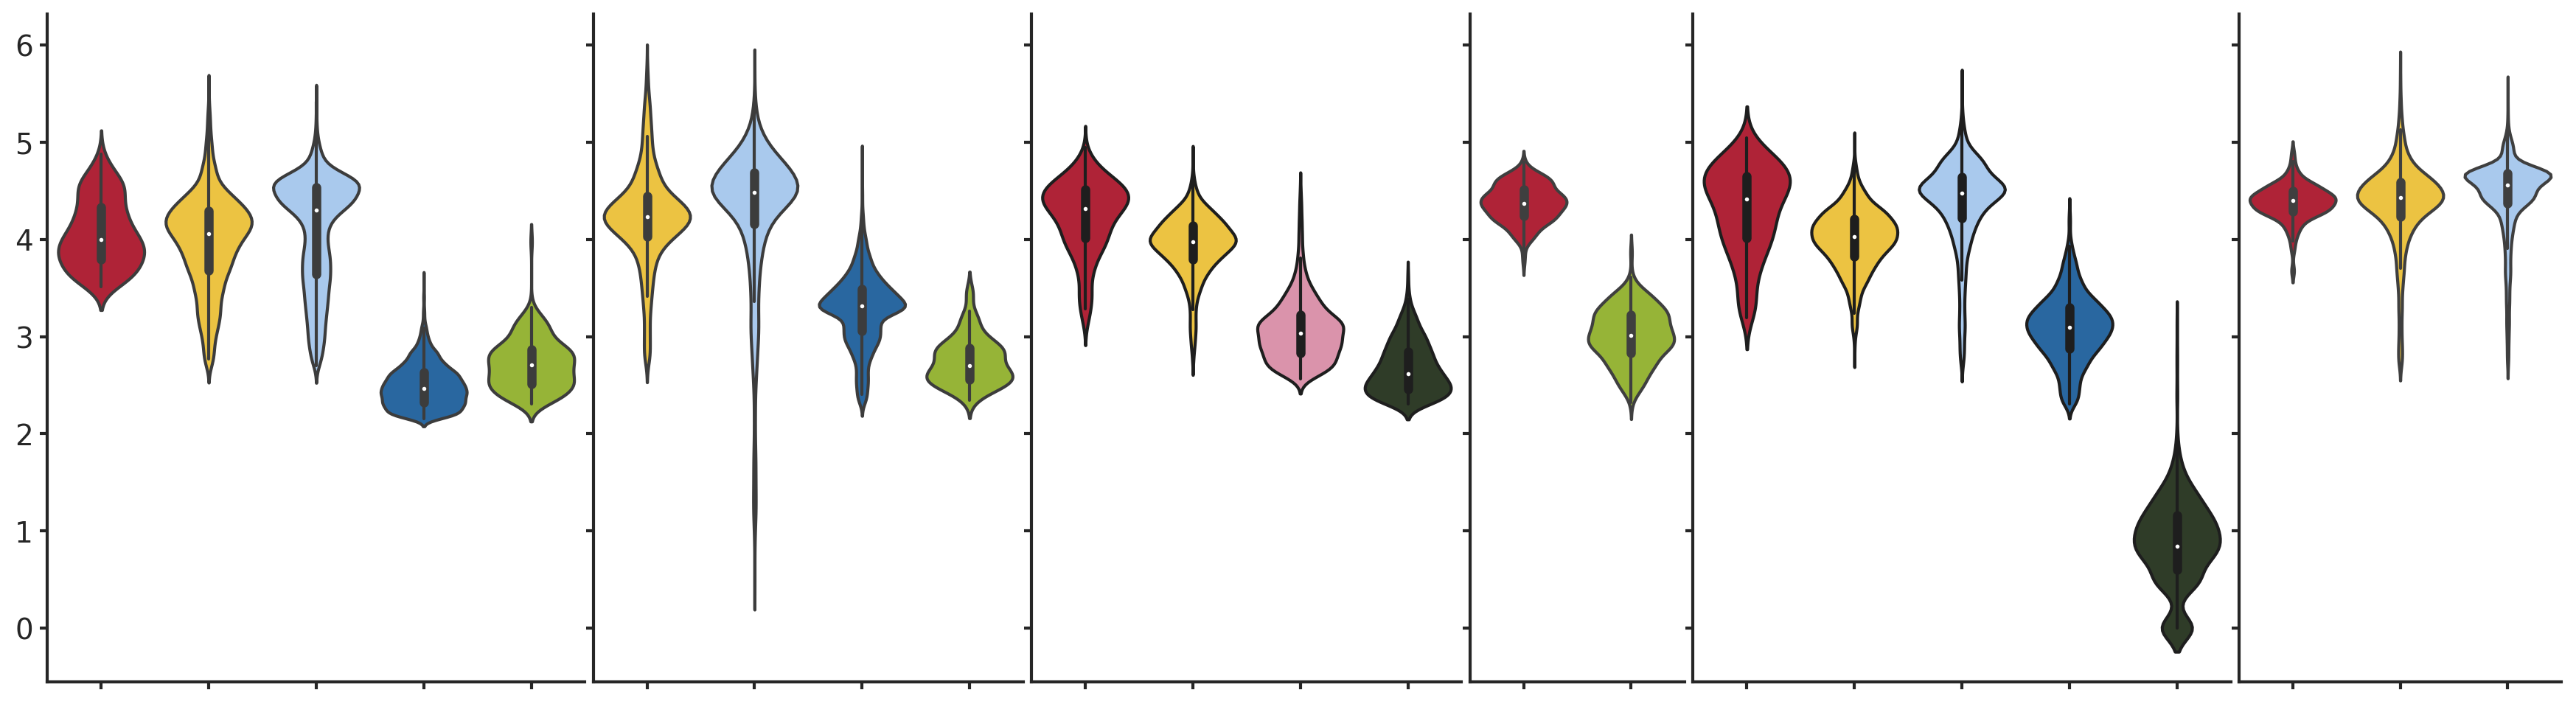

In [38]:
fig, ax = plt.subplots(figsize=(22,6), ncols=6, gridspec_kw={'width_ratios' : [5,4,4,2,5,3], 'wspace' : 0.02}, sharey=True)

sns.violinplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "K562"'), 
               x='Method', y='logC', ax=ax[0], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#ecc342', '#a9c9ed', '#2967a0', '#96b437']),
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', '10x Multiome', 'SHARE-seq', 'SNARE-seq'])

sns.violinplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "GM12878"'), 
               x='Method', y='logC', ax=ax[1], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#ecc342', '#a9c9ed', '#2967a0', '#96b437']),
               order=['ISSAAC-seq (Droplet)', '10x Multiome', 'SHARE-seq', 'SNARE-seq'])

sns.violinplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "HEK293T"'), 
               x='Method', y='logC', ax=ax[2], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#ecc342', '#da93ab', '#2f3c28']),
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', 'Paired-seq', 'sci-CAR-seq'])

sns.violinplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "H1"'), 
               x='Method', y='logC', ax=ax[3], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#96b437']),
               order=['ISSAAC-seq (FACS)', 'SNARE-seq'])

sns.violinplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "NIH3T3"'), 
               x='Method', y='logC', ax=ax[4], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#ecc342', '#a9c9ed', '#2967a0', '#2f3c28']),
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', '10x Multiome', 'SHARE-seq', 'sci-CAR-seq'])


sns.violinplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "E14"'), 
               x='Method', y='logC', ax=ax[5], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#ecc342', '#a9c9ed']),
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', '10x Multiome'])

for a in ax:
    a.set_ylabel('')
    a.set_xticklabels([])
    a.set_xlabel('')
    a.legend('', frameon=False)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_linewidth(1.5)
    a.spines['bottom'].set_linewidth(1.5)

plt.savefig('qc_figures/ATAC_comparison_cell_lines.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [17]:
ax[0].get_ylim()

(-0.5549900705124624, 6.317192577338272)

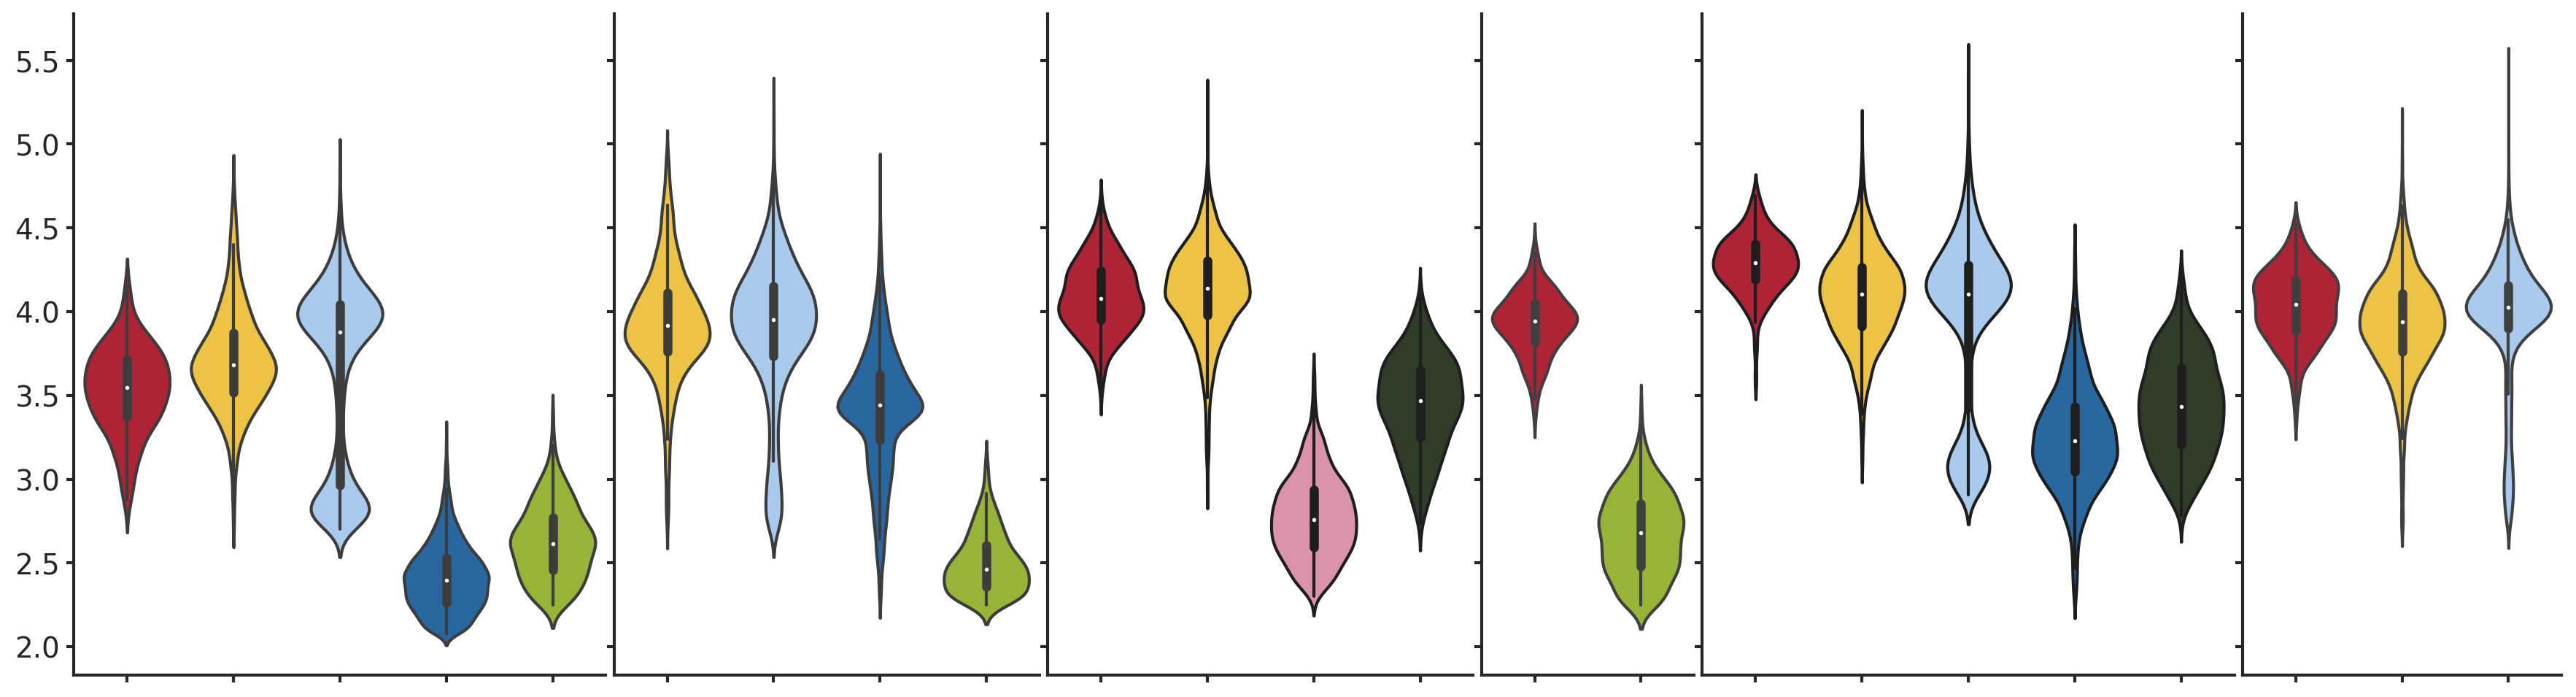

In [39]:
fig, ax = plt.subplots(figsize=(22,6), ncols=6, gridspec_kw={'width_ratios' : [5,4,4,2,5,3], 'wspace' : 0.02}, sharey=True)

sns.violinplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "K562"'), 
               x='Method', y='logC', ax=ax[0], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#ecc342', '#a9c9ed', '#2967a0', '#96b437']),
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', '10x Multiome', 'SHARE-seq', 'SNARE-seq'])

sns.violinplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "GM12878"'), 
               x='Method', y='logC', ax=ax[1], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#ecc342', '#a9c9ed', '#2967a0', '#96b437']),
               order=['ISSAAC-seq (Droplet)', '10x Multiome', 'SHARE-seq', 'SNARE-seq'])

sns.violinplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "HEK293T"'), 
               x='Method', y='logC', ax=ax[2], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#ecc342', '#da93ab', '#2f3c28']),
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', 'Paired-seq', 'sci-CAR-seq'])

sns.violinplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "H1"'), 
               x='Method', y='logC', ax=ax[3], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#96b437']),
               order=['ISSAAC-seq (FACS)', 'SNARE-seq'])

sns.violinplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "NIH3T3"'), 
               x='Method', y='logC', ax=ax[4], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#ecc342', '#a9c9ed', '#2967a0', '#2f3c28']),
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', '10x Multiome', 'SHARE-seq', 'sci-CAR-seq'])


sns.violinplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "E14"'),
               x='Method', y='logC', ax=ax[5], width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#af2337', '#ecc342', '#a9c9ed']),
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', '10x Multiome'])

for a in ax:
    a.set_ylabel('')
    a.set_xticklabels([])
    a.set_xlabel('')
    a.legend('', frameon=False)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_linewidth(1.5)
    a.spines['bottom'].set_linewidth(1.5)
    
plt.savefig('qc_figures/RNA_comparison_cell_line_UMIs.pdf', bbox_inches='tight', transparent=True)

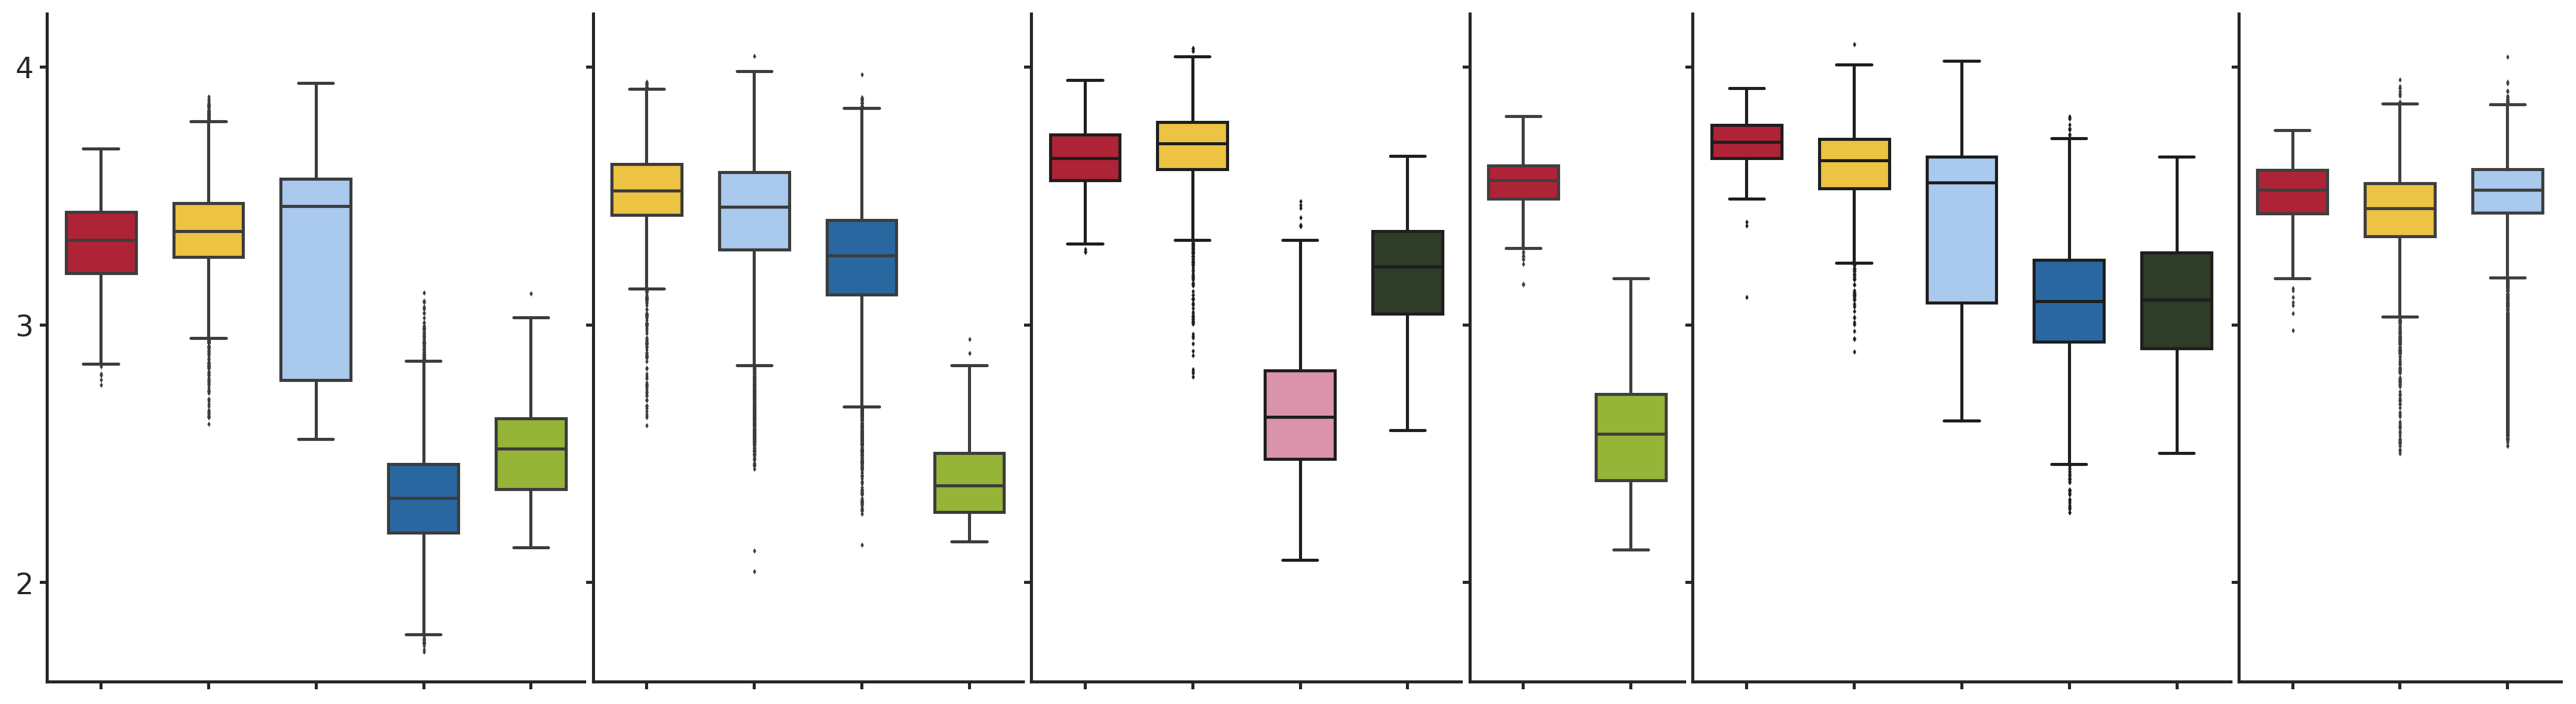

In [40]:
fig, ax = plt.subplots(figsize=(22,6), ncols=6, gridspec_kw={'width_ratios' : [5,4,4,2,5,3], 'wspace' : 0.02}, sharey=True)

sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "K562"'),
            x='Method', y='logF', ax=ax[0], width=0.65, saturation=1, fliersize=0.5,
            palette=sns.color_palette(['#af2337', '#ecc342', '#a9c9ed', '#2967a0', '#96b437']),
            order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', '10x Multiome', 'SHARE-seq', 'SNARE-seq'])

sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "GM12878"'), 
            x='Method', y='logF', ax=ax[1], width=0.65, saturation=1, fliersize=0.5,
            palette=sns.color_palette(['#ecc342', '#a9c9ed', '#2967a0', '#96b437']),
            order=['ISSAAC-seq (Droplet)', '10x Multiome', 'SHARE-seq', 'SNARE-seq'])

sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "HEK293T"'), 
            x='Method', y='logF', ax=ax[2], width=0.65, saturation=1, fliersize=0.5,
            palette=sns.color_palette(['#af2337', '#ecc342', '#da93ab', '#2f3c28']),
            order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', 'Paired-seq', 'sci-CAR-seq'])

sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "H1"'), 
            x='Method', y='logF', ax=ax[3], width=0.65, saturation=1, fliersize=0.5,
            palette=sns.color_palette(['#af2337', '#96b437']),
            order=['ISSAAC-seq (FACS)', 'SNARE-seq'])

sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "NIH3T3"'), 
            x='Method', y='logF', ax=ax[4], width=0.65, saturation=1, fliersize=0.5,
            palette=sns.color_palette(['#af2337', '#ecc342', '#a9c9ed', '#2967a0', '#2f3c28']),
            order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', '10x Multiome', 'SHARE-seq', 'sci-CAR-seq'])


sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "E14"'), 
            x='Method', y='logF', ax=ax[5], width=0.65, saturation=1, fliersize=0.5,
            palette=sns.color_palette(['#af2337', '#ecc342', '#a9c9ed']),
            order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet)', '10x Multiome'])

for a in ax:
    a.set_ylabel('')
    a.set_xticklabels([])
    a.set_xlabel('')
    a.legend('', frameon=False)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_linewidth(1.5)
    a.spines['bottom'].set_linewidth(1.5)

ax[0].set_ylim(1.6146865586264567, 4.204244984949719)
ax[0].set_yticks([2,3,4])

plt.savefig('qc_figures/RNA_comparison_cell_line_features.pdf', bbox_inches='tight', transparent=True)

In [26]:
ax[0].get_ylim()

(1.6146865586264567, 4.204244984949719)

# PBMC comparison

In [30]:
pbmc_metrics = [
    ['ISSAAC-seq (Droplet)', 'PBMC'   , 'ATAC', './issaac-seq_preprocessing/PBMC_Droplet/ATAC/downsampled_30k_reads/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (Droplet)', 'PBMC'   , 'RNA' , './issaac-seq_preprocessing/PBMC_Droplet/RNA/downsampled_60k_reads/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['10x Multiome'        , 'PBMC'   , 'ATAC', './other_methods_preprocessing/10x_multiome/pbmc_unsorted_3k_example_data/ATAC/full_analysis/outs/filtered_mtx/metrics.csv'],
    ['10x Multiome'        , 'PBMC'   , 'RNA' , './other_methods_preprocessing/10x_multiome/pbmc_unsorted_3k_example_data/RNA/full_analysis/outs/Solo.out/Gene/filtered/metrics.csv']
]

In [31]:
dfs = []

for t, c, m, q in pbmc_metrics:
    tmp = pd.read_csv(q)
    tmp['Method'] = t
    tmp['Cell_line'] = c
    tmp['Modality'] = m
    dfs.append(tmp)

pbmc_info = pd.concat(dfs, ignore_index = True)
pbmc_info.head()

,cell,nCounts,nFeatures,Method,Cell_line,Modality
0,AAACAACGAACGTAAA,1873,940,ISSAAC-seq (Droplet),PBMC,ATAC
1,AAACAACGATCTGCAA,2544,1291,ISSAAC-seq (Droplet),PBMC,ATAC
2,AAACACGCTAGTTGAA,3023,1481,ISSAAC-seq (Droplet),PBMC,ATAC
3,AAACACGCTGTTAGAA,4035,2027,ISSAAC-seq (Droplet),PBMC,ATAC
4,AAACACGCTTAACGGG,792,405,ISSAAC-seq (Droplet),PBMC,ATAC


In [32]:
pbmc_info.groupby(['Method', 'Cell_line', 'Modality']).count()

cell  nCounts  nFeatures
Method               Cell_line Modality                          
10x Multiome         PBMC      ATAC      3031     3031       3031
                               RNA       2966     2966       2966
ISSAAC-seq (Droplet) PBMC      ATAC      5227     5227       5227
                               RNA       2479     2479       2479

In [33]:
pbmc_info.groupby(['Method', 'Cell_line', 'Modality']).median()

nCounts  nFeatures
Method               Cell_line Modality                    
10x Multiome         PBMC      ATAC      13685.0     5687.0
                               RNA        1469.0      771.5
ISSAAC-seq (Droplet) PBMC      ATAC       3099.0     1560.0
                               RNA        1536.0     1001.0

In [34]:
pbmc_info['logC'] = np.log10(pbmc_info['nCounts'] + 1)
pbmc_info['logF'] = np.log10(pbmc_info['nFeatures'] + 1)

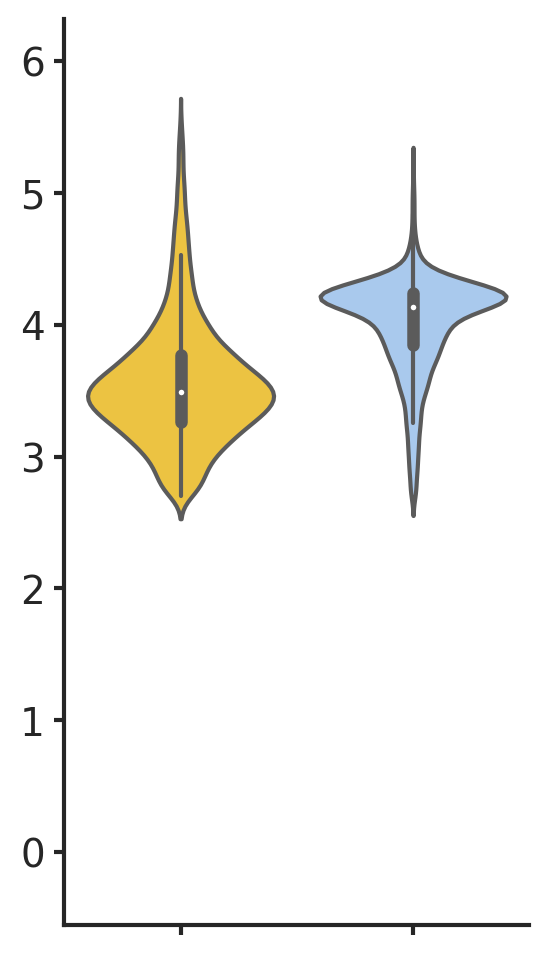

In [37]:
fig, ax = plt.subplots(figsize=(3,6))

sns.violinplot(data = pbmc_info.query('Modality == "ATAC"'), 
               x='Method', y='logC', ax=ax, width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#ecc342', '#a9c9ed']),
               order=['ISSAAC-seq (Droplet)', '10x Multiome'])

ax.set_ylabel('')
ax.set_yticks(range(7))
ax.set_ylim(-0.5549900705124624, 6.317192577338272)
ax.legend('', frameon=False)
ax.set_xticklabels([])
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.savefig('qc_figures/ATAC_comparison_PBMC.pdf', bbox_inches='tight', transparent=True)

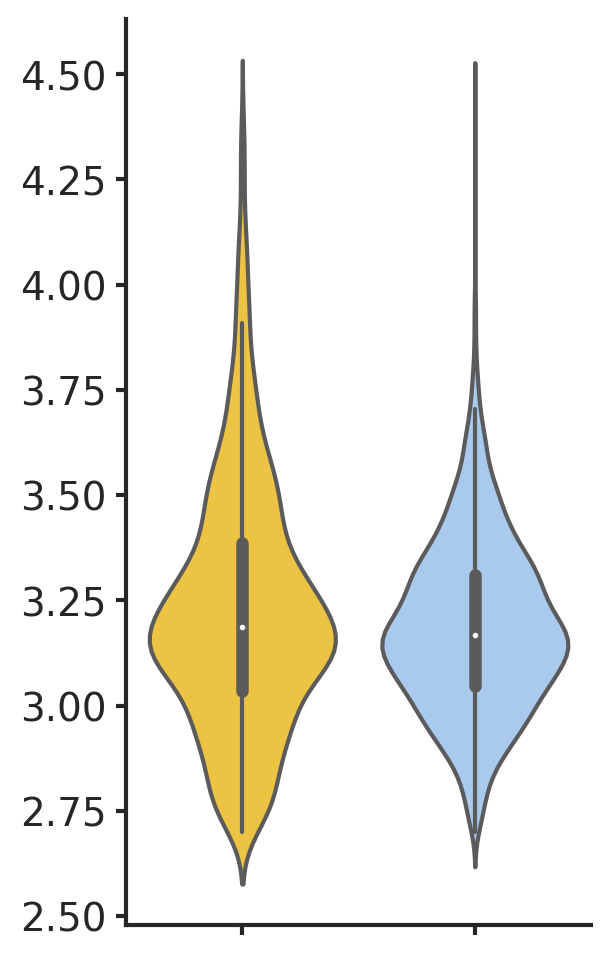

In [41]:
fig, ax = plt.subplots(figsize=(3,6))

sns.violinplot(data = pbmc_info.query('Modality == "RNA"'), 
               x='Method', y='logC', ax=ax, width=0.8, saturation=1,
               scale='width', palette=sns.color_palette(['#ecc342', '#a9c9ed']),
               order=['ISSAAC-seq (Droplet)', '10x Multiome'])

ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_xlabel('')
ax.legend('', frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.savefig('qc_figures/RNA_comparison_PBMC_UMI.pdf', bbox_inches='tight', transparent=True)

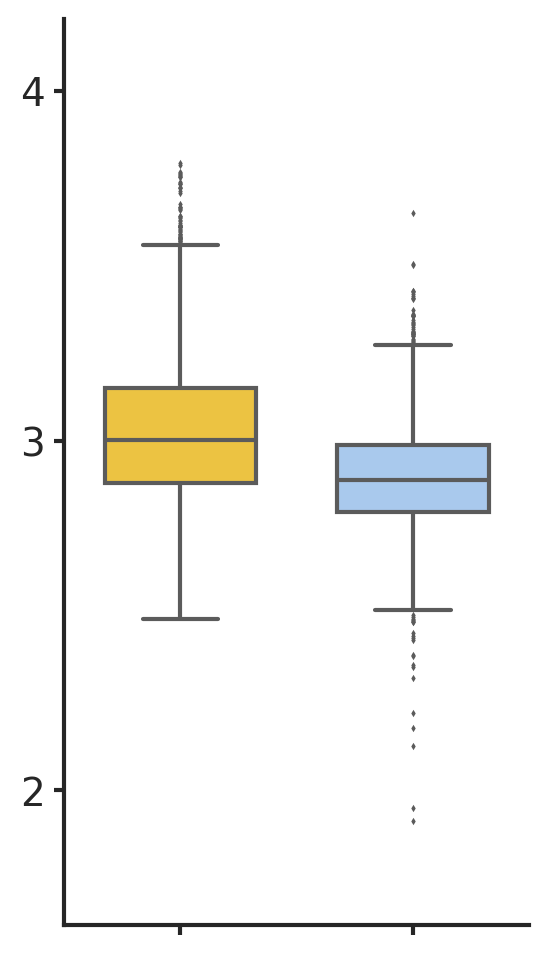

In [53]:
fig, ax = plt.subplots(figsize=(3,6))

sns.boxplot(data = pbmc_info.query('Modality == "RNA"'), fliersize=0.5,
            x='Method', y='logF', ax=ax, width=0.65, saturation=1,
            palette=sns.color_palette(['#ecc342', '#a9c9ed']),
            order=['ISSAAC-seq (Droplet)', '10x Multiome'])

ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_xlabel('')
ax.legend('', frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_ylim(1.6146865586264567, 4.204244984949719)
ax.set_yticks([2,3,4])
plt.savefig('qc_figures/RNA_comparison_PBMC_features.pdf', bbox_inches='tight', transparent=True)

# Mouse brain samples comparison

In [43]:
brain_metrics = [
    ['ISSAAC-seq (FACS)'        , 'ATAC', './issaac-seq_preprocessing/mCortex_FACS/ATAC/downsampled_50k_reads/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (FACS)'        , 'RNA' , './issaac-seq_preprocessing/mCortex_FACS/RNA/downsampled_50k_reads/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['ISSAAC-seq (Droplet) rep1', 'ATAC', './issaac-seq_preprocessing/mCortex_Droplet_rep1/ATAC/downsampled_50k_reads/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (Droplet) rep1', 'RNA' , './issaac-seq_preprocessing/mCortex_Droplet_rep1/RNA/downsampled_50k_reads/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['ISSAAC-seq (Droplet) rep2', 'ATAC', './issaac-seq_preprocessing/mCortex_Droplet_rep2/ATAC/downsampled_50k_reads/outs/filtered_mtx/metrics.csv'],
    ['ISSAAC-seq (Droplet) rep2', 'RNA' , './issaac-seq_preprocessing/mCortex_Droplet_rep2/RNA/downsampled_50k_reads/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['10x Multiome'             , 'ATAC', './other_methods_preprocessing/10x_multiome/e18_mouse_brain_5k_example_data/ATAC/full_analysis/outs/filtered_mtx/metrics.csv'],
    ['10x Multiome'             , 'RNA' , './other_methods_preprocessing/10x_multiome/e18_mouse_brain_5k_example_data/RNA/full_analysis/outs/Solo.out/Gene/filtered/metrics.csv'],
    ['SHARE-seq'                , 'ATAC', './other_methods_preprocessing/share-seq/mouse_brain/ATAC/filtered/metrics.csv'],
    ['SHARE-seq'                , 'RNA' , './other_methods_preprocessing/share-seq/mouse_brain/RNA/filtered/metrics.csv'],
    ['Paired-seq (Adult_CTX)'   , 'ATAC', './other_methods_preprocessing/paired-seq/adult_cortex/Adult_Cerebrail_Cortex/Adult_CTX_DNA_filtered/metrics.csv'],
    ['Paired-seq (Adult_CTX)'   , 'RNA' , './other_methods_preprocessing/paired-seq/adult_cortex/Adult_Cerebrail_Cortex/Adult_CTX_RNA_filtered/metrics.csv'],
    ['Paired-seq (FB)'          , 'ATAC', './other_methods_preprocessing/paired-seq/fetal_forebrain/Fetal_Forebrain/FB_DNA_filtered/metrics.csv'],
    ['Paired-seq (FB)'          , 'RNA' , './other_methods_preprocessing/paired-seq/fetal_forebrain/Fetal_Forebrain/FB_RNA_filtered/metrics.csv'],
    ['SNARE-seq (Adult_CTX)'    , 'ATAC', './other_methods_preprocessing/snare-seq/adult_mouse_brain_cortex/ATAC/outs/filtered/metrics.csv'],
    ['SNARE-seq (Adult_CTX)'    , 'RNA' , './other_methods_preprocessing/snare-seq/adult_mouse_brain_cortex/RNA/metrics.csv'],
    ['SNARE-seq (P0_CTX)'       , 'ATAC', './other_methods_preprocessing/snare-seq/p0_mouse_brain_cortex/ATAC/outs/filtered/metrics.csv'],
    ['SNARE-seq (P0_CTX)'       , 'RNA' , './other_methods_preprocessing/snare-seq/p0_mouse_brain_cortex/RNA/metrics.csv']
]

In [44]:
dfs = []

for t, m, q in brain_metrics:
    tmp = pd.read_csv(q)
    tmp['Method'] = t
    tmp['Modality'] = m
    dfs.append(tmp)

brain_info = pd.concat(dfs, ignore_index = True)
brain_info.head()

,cell,nCounts,nFeatures,Method,Modality
0,AAACAAACATAGCCTT,32357,12962,ISSAAC-seq (FACS),ATAC
1,AAACCTCAATAGCCTT,9029,4231,ISSAAC-seq (FACS),ATAC
2,AAAGAAGAATAGCCTT,13533,6324,ISSAAC-seq (FACS),ATAC
3,AAAGTGCTATAGCCTT,7492,3510,ISSAAC-seq (FACS),ATAC
4,AACAAGATATAGCCTT,8462,4036,ISSAAC-seq (FACS),ATAC


In [45]:
brain_info['logC'] = np.log10(brain_info['nCounts'])
brain_info['logF'] = np.log10(brain_info['nFeatures'])

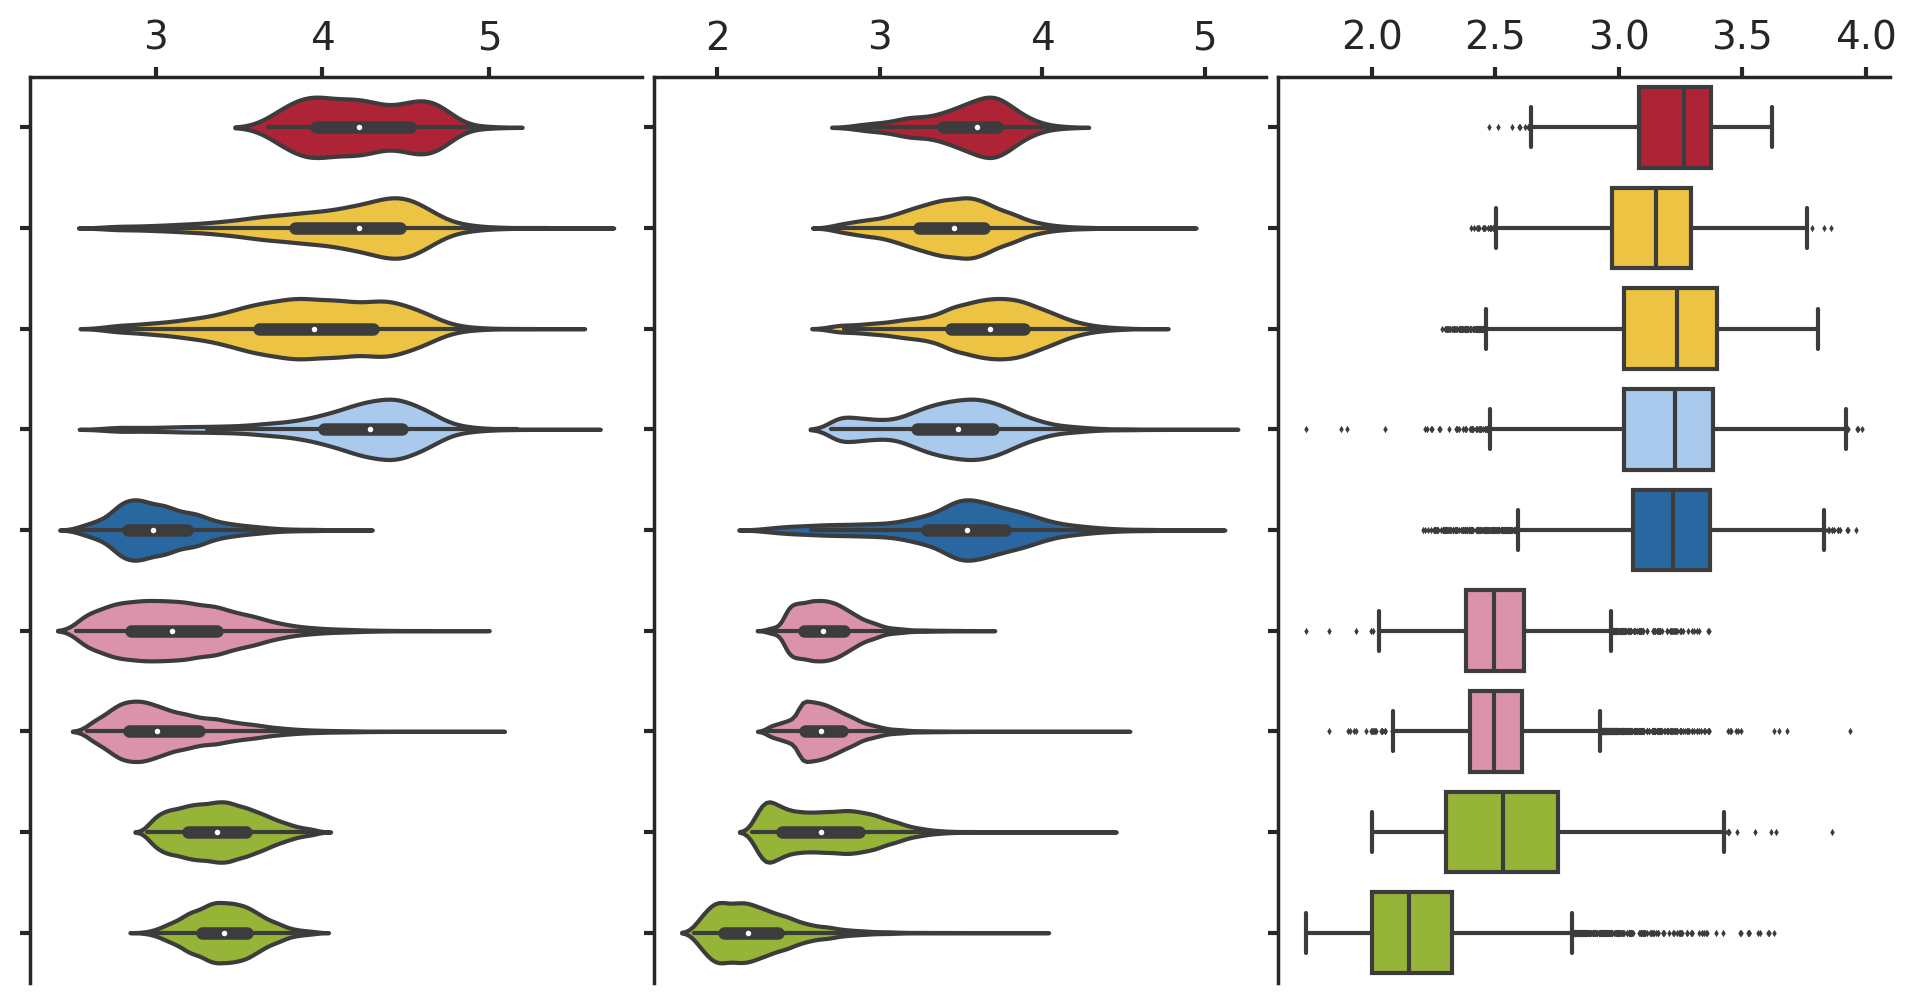

In [46]:
mpl.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
mpl.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

fig, ax = plt.subplots(figsize=(12,6), ncols=3, gridspec_kw={'width_ratios' : [1,1,1], 'wspace' : 0.02}, sharey=True)

sns.violinplot(data = brain_info.query('Modality == "ATAC"'),
               x='logC', y='Method', ax=ax[0], width=0.6, saturation=1, scale='width', orient='h',
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet) rep1', 'ISSAAC-seq (Droplet) rep2', '10x Multiome',
                      'SHARE-seq', 'Paired-seq (Adult_CTX)', 'Paired-seq (FB)', 'SNARE-seq (Adult_CTX)', 'SNARE-seq (P0_CTX)'],
               palette=sns.color_palette(['#af2337', '#ecc342', '#ecc342', '#a9c9ed', '#2967a0', '#da93ab', '#da93ab', '#96b437', '#96b437']))

sns.violinplot(data = brain_info.query('Modality == "RNA"'),
               x='logC', y='Method', ax=ax[1], width=0.6, saturation=1, scale='width', orient='h',
               order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet) rep1', 'ISSAAC-seq (Droplet) rep2', '10x Multiome',
                      'SHARE-seq', 'Paired-seq (Adult_CTX)', 'Paired-seq (FB)', 'SNARE-seq (Adult_CTX)', 'SNARE-seq (P0_CTX)'],
               palette=sns.color_palette(['#af2337', '#ecc342', '#ecc342', '#a9c9ed', '#2967a0', '#da93ab', '#da93ab', '#96b437', '#96b437']))

sns.boxplot(data = brain_info.query('Modality == "RNA"'),
            x='logF', y='Method', ax=ax[2], saturation=1, fliersize=0.5, orient='h',
            order=['ISSAAC-seq (FACS)', 'ISSAAC-seq (Droplet) rep1', 'ISSAAC-seq (Droplet) rep2', '10x Multiome',
                      'SHARE-seq', 'Paired-seq (Adult_CTX)', 'Paired-seq (FB)', 'SNARE-seq (Adult_CTX)', 'SNARE-seq (P0_CTX)'],
               palette=sns.color_palette(['#af2337', '#ecc342', '#ecc342', '#a9c9ed', '#2967a0', '#da93ab', '#da93ab', '#96b437', '#96b437']))

for a in ax:
    a.set_ylabel('')
    a.set_yticklabels([])
    a.set_xlabel('')
    a.spines['bottom'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_linewidth(1.25)
    a.spines['top'].set_linewidth(1.25)

plt.savefig('qc_figures/mCortex_comparisons_all.pdf', bbox_inches='tight', transparent=True)

In [54]:
brain_info.groupby(['Method', 'Modality']).median()

nCounts  nFeatures      logC      logF
Method                    Modality                                        
10x Multiome              ATAC      19186.0     8019.0  4.282984  3.904120
                          RNA        3049.0     1696.0  3.484157  3.229426
ISSAAC-seq (Droplet) rep1 ATAC      16619.5     8138.0  4.220618  3.910518
                          RNA        2848.5     1410.0  3.454616  3.149219
ISSAAC-seq (Droplet) rep2 ATAC       8955.0     4545.0  3.952066  3.657534
                          RNA        4756.5     1716.0  3.677287  3.234517
ISSAAC-seq (FACS)         ATAC      16464.0     7024.0  4.216535  3.846585
                          RNA        3990.0     1835.0  3.600973  3.263636
Paired-seq (Adult_CTX)    ATAC       1246.5     1200.0  3.095692  3.079181
                          RNA         448.0      313.0  2.651278  2.495544
Paired-seq (FB)           ATAC       1011.0      989.0  3.004751  2.995196
                          RNA         438.0      313.0  2.641474  2.495544
SHARE-seq                 ATAC        969.0      956.0  2.986324  2.980458
                          RNA        3469.0     1655.0  3.540204  3.218798
SNARE-seq (Adult_CTX)     ATAC       2324.0     2197.0  3.366236  3.341830
                          RNA         433.0      340.0  2.636488  2.531479
SNARE-seq (P0_CTX)        ATAC       2583.0     2346.5  3.412124  3.370421
                          RNA         155.0      141.0  2.190332  2.149219